# Instructions

This programming test is all about "air quality". To solve all tasks you need the following 3 data files:

- **pollutants1.csv** contains information on air pollutants measured at different sites on different days. The file has the following columns:
    - `site_id`: unique identifier for the site
    - `date`: date of the measurement
    - `pm10`: particulate matter (german: Feinstaub) with a maximum diameter of 10 micrometers (µg/m³)
    - `pm2.5`: particulate matter with a maximum diameter of 2.5 micrometers (µg/m³)
- **pollutants2.csv** contains information on further air pollutants
    - `site_id`: unique identifier for the site
    - `date`: date of the measurement
    - `pollutant`: name of the pollutant (no2: nitrogen dioxide, o3: ozone, so2: sulfur dioxide)
    - `value`: measured value of the pollutant in µg/m³

- **sites.csv** contains meta data on the sites

**Notes**: 

- If you do not manage to prepare the full data set in exercises 1-3, then you may use the file **backup.csv** to solve the other exercises. 
- Overall you can get 110 points. Of these, 10 points are bonus points. Note that only a maximum of 100 points will be counted for your final score (composed of this test and the two projects).



# Exercise 1 (15 points)

Import packages here

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Read in the data set `pollutants1.csv` and display the first five rows. 

In [154]:
df_1 = pd.read_csv('pollutants1.csv')
df_1.set_index(["site_id"], inplace=True)
df_1.head(5)

,date,pm10,pm2.5
site_id,,,
at0ill1,2023-01-01,18.279,16.07
at0ill1,2023-01-02,13.359,12.36
at0ill1,2023-01-03,11.934,10.135
at0ill1,2023-01-04,8.834,7.792
at0ill1,2023-01-05,5.947,5.075


Print the number of rows and columns in the dataset.

In [155]:
print(f"There are {df_1.shape[0]} rows and {df_1.shape[1]} columns")


There are 24062 rows and 3 columns


Pollutants are measured at specific sites which can be identified via their `site_id`. How many different sites are contained in the data?

In [156]:
print("Number of diferent sites:")
df_1.index.unique().shape[0]

Number of diferent sites:


67

# Exercise 2 (25 points)

Read in the data set `pollutants2.csv` and display the first five values.

In [169]:
df_2 = pd.read_csv('pollutants2.csv')
df_2.head(5)

,site_id,date,pollutant,value
0,at0ill1,2023-01-01,no2,6.234
1,at0ill1,2023-01-02,no2,9.243
2,at0ill1,2023-01-03,no2,17.199
3,at0ill1,2023-01-04,no2,6.280
4,at0ill1,2023-01-05,no2,4.881


Combine both data sets (pollutants1, pollutants2) _suitably_ into one data set. In the combined data, a single row should contain the measurements of all pollutants (`pm10`, `pm2.5`, `no2`, `so2`, `o3`) at one site on one day. Display the first five rows of the combined data and print its row number?

In [170]:
for pollutant_name in df_2.pollutant.unique().tolist():
        df_2[pollutant_name] = df_2[(df_2.pollutant == pollutant_name)]['value']
    

df_2.drop(labels='value',axis=1, inplace=True)
df_2 = df_2.groupby('site_id').first()
df_2.reset_index(inplace=True)
df_2.set_index(['site_id'], inplace=True)
df_2.drop(labels='date',axis=1, inplace=True)

df_u = pd.merge(left=df_2,left_index=True, right=df_1, right_index=True, how='inner')
df_u.reset_index(inplace=True)

display(df_u.head(5))
print(f"Rows {df_u.shape[0]}")

,site_id,pollutant,no2,so2,o3,date,pm10,pm2.5
0,at0ill1,no2,6.234,0.38,28.1,2023-01-01,18.279,16.07
1,at0ill1,no2,6.234,0.38,28.1,2023-01-02,13.359,12.36
2,at0ill1,no2,6.234,0.38,28.1,2023-01-03,11.934,10.135
3,at0ill1,no2,6.234,0.38,28.1,2023-01-04,8.834,7.792
4,at0ill1,no2,6.234,0.38,28.1,2023-01-05,5.947,5.075


Rows 24062


Briefly explain your steps and why you choose them.

1) For loop: for all the different pollutants create a new column and add a row for each pollutant (other pollutants values will be NaN)
2) GroupBy.first(): for each site keep the first no NaN value of each column, (site_id	date	pollutant) should be all same
pollutants will be only not NaN 1 row
3) Merge inner with other pollutants from other csv. Inner because we want all sites to match (my decission)

# Exercise 3 (15 points)

Read in the data set `sites.csv` and merge it suitably with the combined data set from exercise 2. Display the first five rows of the merged data set.

In [171]:
df_sites = pd.read_csv('sites.csv')
df_sites.rename({"site_id":"site_id_sites"},axis=1,inplace=True)
df_merged = pd.merge(left=df_u, left_on="site_id", right=df_sites, right_on="site_id_sites", how="left")
df_merged

,site_id,pollutant,no2,so2,o3,date,pm10,pm2.5,site_id_sites,site,country,site_type,site_area,elevation
0,at0ill1,no2,6.234,0.38,28.10,2023-01-01,18.279,16.07,at0ill1,Illmitz am Neusiedler See,austria,background,rural_regional,117.0
1,at0ill1,no2,6.234,0.38,28.10,2023-01-02,13.359,12.36,at0ill1,Illmitz am Neusiedler See,austria,background,rural_regional,117.0
2,at0ill1,no2,6.234,0.38,28.10,2023-01-03,11.934,10.135,at0ill1,Illmitz am Neusiedler See,austria,background,rural_regional,117.0
3,at0ill1,no2,6.234,0.38,28.10,2023-01-04,8.834,7.792,at0ill1,Illmitz am Neusiedler See,austria,background,rural_regional,117.0
4,at0ill1,no2,6.234,0.38,28.10,2023-01-05,5.947,5.075,at0ill1,Illmitz am Neusiedler See,austria,background,rural_regional,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24057,pt03083,no2,9.925,NaN,77.25,2023-12-27,13.754,5.612,pt03083,Laranjeiro,portugal,background,urban,63.0
24058,pt03083,no2,9.925,NaN,77.25,2023-12-28,13.238,4.188,pt03083,Laranjeiro,portugal,background,urban,63.0
24059,pt03083,no2,9.925,NaN,77.25,2023-12-29,15.954,7.617,pt03083,Laranjeiro,portugal,background,urban,63.0
24060,pt03083,no2,9.925,NaN,77.25,2023-12-30,28.319,15.081,pt03083,Laranjeiro,portugal,background,urban,63.0


Does the sites data set contain meta data on all sites that are contained in the combined data set from exercise 2? If not, which sites are missing?

In [173]:
df_merged[df_merged.site_id_sites.isna()]

,site_id,pollutant,no2,so2,o3,date,pm10,pm2.5,site_id_sites,site,country,site_type,site_area,elevation
19373,nl00644,no2,5.076,0.597,63.408,2023-01-01,14.617,4.082,NaN,NaN,NaN,NaN,NaN,NaN
19374,nl00644,no2,5.076,0.597,63.408,2023-01-02,10.083,1.214,NaN,NaN,NaN,NaN,NaN,NaN
19375,nl00644,no2,5.076,0.597,63.408,2023-01-03,7.417,7.105,NaN,NaN,NaN,NaN,NaN,NaN
19376,nl00644,no2,5.076,0.597,63.408,2023-01-04,10.830,2.674,NaN,NaN,NaN,NaN,NaN,NaN
19377,nl00644,no2,5.076,0.597,63.408,2023-01-05,22.617,4.962,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21511,pl0209a,no2,14.108,6.907,51.121,2023-12-27,17.171,13.03,NaN,NaN,NaN,NaN,NaN,NaN
21512,pl0209a,no2,14.108,6.907,51.121,2023-12-28,11.149,9.644,NaN,NaN,NaN,NaN,NaN,NaN
21513,pl0209a,no2,14.108,6.907,51.121,2023-12-29,5.279,4.03,NaN,NaN,NaN,NaN,NaN,NaN
21514,pl0209a,no2,14.108,6.907,51.121,2023-12-30,9.031,7.269,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
df = pd.read_csv('backup.csv')

# Exercise 4 (20 points)

Of all German sites with `site_type` "traffic" or "background", display the 5 observations with the highest `pm10` values. Display only the relevant columns (site, site_type, date, and pm10).

In [183]:
df[(df.country == 'germany') & (df.site_type.isin(["traffic","backgroung"]))] \
    [["site", "site_type", "date", "pm10"]].sort_values(by='pm10', ascending=False).head(5)

,site,site_type,date,pm10
4735,B Friedrichshain-Frankfurter Allee,traffic,2023-12-31,790.900
5458,München/Stachus,traffic,2023-12-31,399.000
6903,Hamburg Habichtstraße,traffic,2023-12-31,362.430
7262,Leipzig-Mitte,traffic,2023-12-31,328.620
6878,Hamburg Habichtstraße,traffic,2023-12-06,66.703


The World Health Organization recommends a maximum yearly average `pm10` value of 15 µg/m³. What is the percentage of sites that exceeds this value?

In [195]:
df_gby_site = df.groupby('site_id').pm10.mean()
exceed_pm10 = (df_gby_site > 15).sum() / df_gby_site.notna().sum()
print(f"{exceed_pm10*100:.3f}%")

73.846%


# Exercise 5 (20 points)

Visualize the following patterns related to ozone (`o3`) in the data:

- Calculate the average ozone values per site and use a scatter plot to show how ozone is related to the `elevation` of the site
- Use a line plot to show how ozone immissions at the site "Schauinsland" have developed over time

Arrange both plots as subplots of a single figure. Create a title for the entire figure and titles for each subplot.

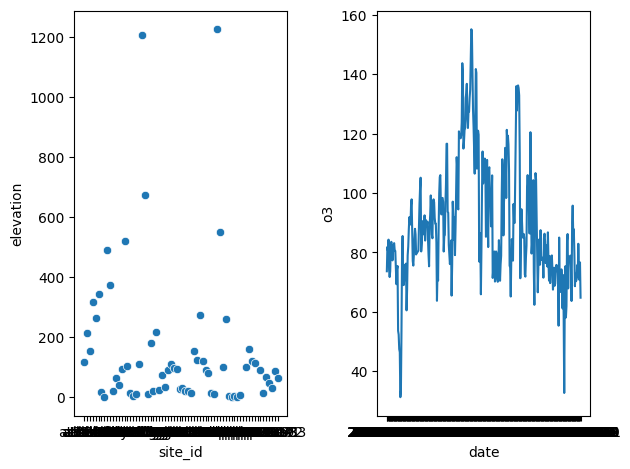

In [164]:
data1 = pd.DataFrame(df.groupby('site_id').o3.mean())
elevs = df[['site_id','elevation']].drop_duplicates()
data1 = pd.merge(left=data1, left_index=True, right=elevs, right_on='site_id', how='inner')

data2 = df[df.site == "Schauinsland"][['o3','date']]

fig, ax = plt.subplots(ncols=2,nrows=1)
sns.scatterplot(data=data1, x='site_id', y='elevation',ax=ax[0])
sns.lineplot(data=data2, x='date', y='o3')

fig.tight_layout()

# Exercise 6 (15 points)

Display for all sites in Hamburg the average value of `pm10`, `pm2.5` and `no2`. Hint: consider all sites that contain "Hamburg" in the site name.

In [165]:
df['pm2.5'] = pd.to_numeric(df['pm2.5'], errors='coerce')
df_ham_sites = df[df.site.str.contains("HAMBURG",case=False, na=False)]
pd.DataFrame({
    "pm10":df_ham_sites['pm10'].mean(),
    "pm2.5":df_ham_sites['pm2.5'].mean(),
    "no2":df_ham_sites['no2'].mean()
}, index=["Hamburg sites"])


,pm10,pm2.5,no2
Hamburg sites,15.565388,9.335079,24.648383
